In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc'
              , 'comp.sys.ibm.pc.hardware'
              , 'comp.sys.mac.hardware', 'comp.windows.x'
              , 'misc.forsale', 'rec.autos', 'rec.motorcycles'
              , 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt'
              , 'sci.electronics', 'sci.med', 'sci.space'
              , 'soc.religion.christian','talk.politics.guns'
              , 'talk.politics.mideast', 'talk.politics.misc'
              , 'talk.religion.misc']

train = fetch_20newsgroups(subset='train', categories=categories)

test = fetch_20newsgroups(subset='test', categories=categories)


print(train.data[10])
print(test.data[5])
print (len(train.data))

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

labels = model.predict(test.data)

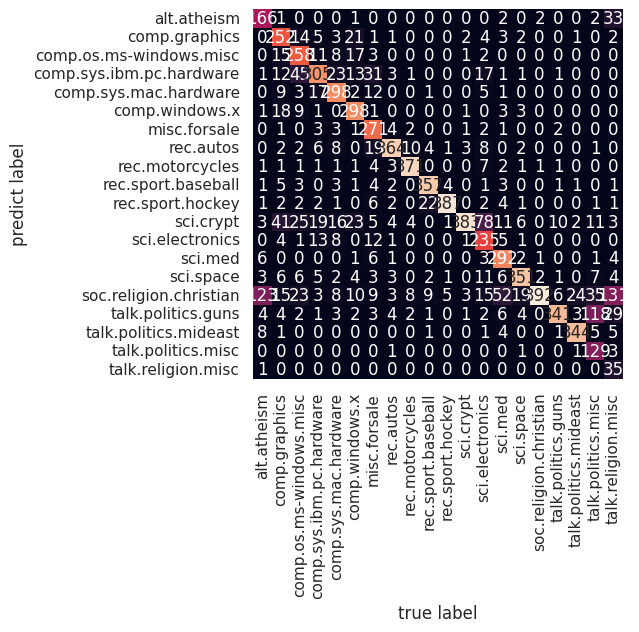

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=train.target_names,
            yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predict label');

In [12]:
def predict_category(s, train=train, model=model):
  pred= model.predict([s])
  return train.target_names[pred[0]]

In [14]:
predict_category('Sending load to International Space Station')

'sci.space'

In [16]:
predict_category('BMW is better than Audi')

'rec.autos'